# Amazon Fine Food Reviews Analysis


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
reviews = pd.read_csv("Reviews.csv")
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


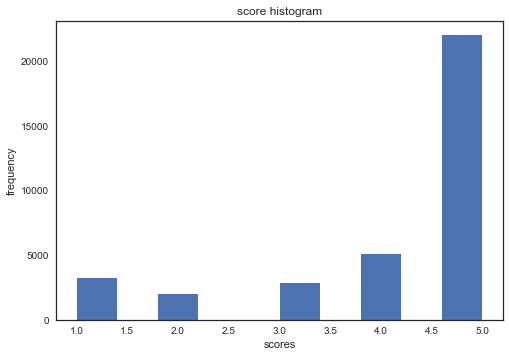

In [3]:
import numpy as np
import pylab as py
score= np.array(reviews['Score'])
import math
new_score= [value for value in score if not math.isnan(value)]
plt.hist(new_score)
plt.title("score histogram")
plt.xlabel("scores")
plt.ylabel("frequency")
plt.show()

This histogram shows that the 5 star or positive revies are the most common. 

(0, 200)

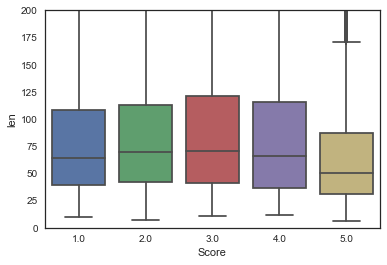

In [4]:
%matplotlib inline
count_words=reviews['Text'].str.split().str.len()
scores= reviews['Score']
df=pd.concat([scores,count_words], axis=1)
df.columns=['Score','len']
sns.boxplot(x="Score",y="len",data=df)
plt.ylim(0,200)

If you see the Boxplots, the size of the review of 5 stars are less 

(0, 200)

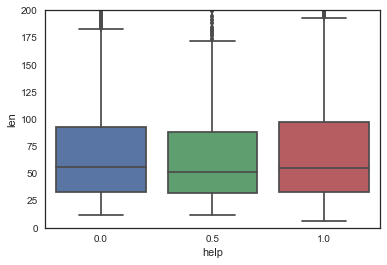

In [5]:
helpfact=[]
helpfulnessfactor= reviews['HelpfulnessNumerator']/reviews['HelpfulnessDenominator']
for i in helpfulnessfactor:
    if i>=0.50:
        helpfact.append(1)
    if i<0.50 and i>=0.25:
        helpfact.append(0.5)
    if i<0.25 :
        helpfact.append(0)
helpfulnessfactor1=pd.DataFrame(helpfact)
df1=pd.concat([helpfulnessfactor1,count_words],axis=1)
df1.columns=['help','len']
sns.boxplot(x='help',y='len',data=df1)
plt.ylim(0,200)

If you see the boxplots the numbers omn the X axis says: `0.0:less than 25% found helpful
0.5 says 25% to 50 % thinks this helpful. 1.0 says that more than 50% found this helpful`
so the longer reviews tends to be slightly more helpful

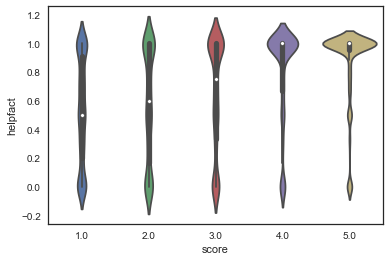

In [6]:
df2=pd.concat([helpfulnessfactor,scores],axis=1)
df2.columns=['helpfact','score']
sns.violinplot(x='score',y='helpfact',data=df2)

this plot clearly shows that the positive reviews are found more helpful as the width of the violin plot is highest at rating=5

In [7]:
import sqlite3
conn=sqlite3.connect("database.sqlite")
cur=conn.cursor()
cur.execute('select USerID, Summary, Text, Score, HelpfulnessNumerator,HelpfulnessDenominator from reviews where UserID in(select UserID as UserId  from reviews group by UserID having count(UserID)>50)')
freq_reviewer=pd.DataFrame(cur.fetchall())
freq_reviewer.columns=['UserId','Summary','Text','Score','HelpfulnessNumerator','HelpfulnessDenominator']
cur.execute('select UserID, Summary, Text, Score, HelpfulnessNumerator, HelpfulnessDenominator from reviews where UserID not in(select USerID from reviews where UserID in(select UserID as UserId  from reviews group by UserID having count(UserID)>50))')
non_freq_reviewer=pd.DataFrame(cur.fetchall())
non_freq_reviewer.columns=['UserId','Summary','Text','Score','HelpfulnessNumerator','HelpfulnessDenominator']

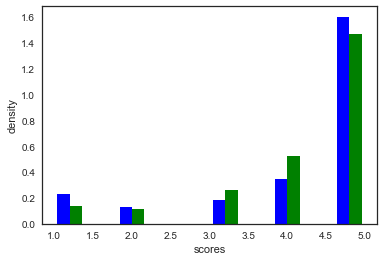

In [8]:
from matplotlib import pyplot
freq_reviewer_score=np.array(freq_reviewer['Score'])
non_freq_reviewer_score=np.array(non_freq_reviewer['Score'])
colors=['blue','green']
labels=['non_freq_reviewer_score','freq_reviewer_score']
plt.hist([non_freq_reviewer_score,freq_reviewer_score],color=colors,label=labels,normed=True)
plt.xlabel('scores')
plt.ylabel('density')
plt.show()

the blue color indicates the non frequent reviewers while the green color is for frequent reviewers. It says that the frequent reviewers are discerning on their ratings as they give less 5 star reviews and more 3 star and 4 star reviews than the non-frequent reviewers.

In [36]:
freq_reviewer_length= freq_reviewer['Text'].str.split().str.len()


In [37]:
non_freq_reviewer_length=non_freq_reviewer['Text'].str.split().str.len()

In [41]:
freq_reviewer_length_df=pd.DataFrame(freq_reviewer_length)
non_freq_reviewer_length_df=pd.DataFrame(non_freq_reviewer_length)

(0, 400)

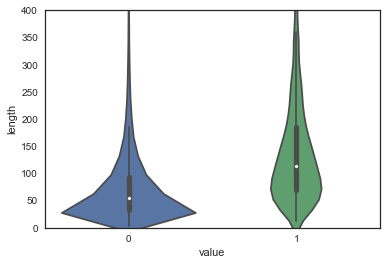

In [55]:
frames=[freq_reviewer_length_df,non_freq_reviewer_length_df]
df2=pd.concat(frames)
sns.violinplot(x='value',y='length',data=df2)
plt.ylim(0,400)

this violin plot clearly says that the frequent reviewers i.e the green plot is wider for higher values that means that the frequent reviewers usually write longer reviews

In [61]:
helpfact_freq=[]
helpfulnessfactor_freq= freq_reviewer['HelpfulnessNumerator']/freq_reviewer['HelpfulnessDenominator']
for i in helpfulnessfactor_freq:
    if i>=0.50:
        helpfact_freq.append(1)
    if i<0.50 and i>=0.25:
        helpfact_freq.append(0.5)
    if i<0.25 :
        helpfact_freq.append(0)
helpfulnessfactor_freq1=np.array(helpfact_freq)
helpfact_nonfreq=[]
helpfulnessfactor_nonfreq= non_freq_reviewer['HelpfulnessNumerator']/non_freq_reviewer['HelpfulnessDenominator']
for i in helpfulnessfactor_nonfreq:
    if i>=0.75:
        helpfact_nonfreq.append(1)
    if i<0.75 and i>=0.25:
        helpfact_nonfreq.append(0.5)
    if i<0.25 :
        helpfact_nonfreq.append(0)
helpfulnessfactor_nonfreq1=np.array(helpfact_nonfreq)

([array([ 0.30018165,  0.10467757,  2.59514078]),
  array([ 0.3887724 ,  0.51281602,  2.09841159])],
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ]),
 <a list of 2 Lists of Patches objects>)

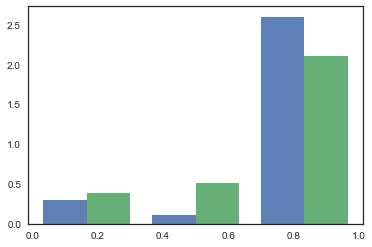

In [65]:
plt.hist([helpfulnessfactor_freq1,helpfulnessfactor_nonfreq1],bins=3,alpha=0.9,normed=1)
plt.xlabel('helpfulness factor')

the blue bins are the frequent reviewers as you can see the frequent reviewers are found more helpful compared to the green bins which are of non frequent reviewers.


In [1]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import sqlite3
import pandas as pd
import re
import string
import nltk
con = sqlite3.connect('database.sqlite')

messages = pd.read_sql_query("""
SELECT Score, Summary,Text
FROM reviews
WHERE Score != 3
""", con)
messages["Sentiment"] = messages["Score"].apply(lambda score: "positive" if score > 3 else "negative")
del messages['Score']
Sentiment=messages['Sentiment']
del messages['Sentiment']
X_train, X_test,Y_train,Y_test = train_test_split(messages,Sentiment, test_size=0.2)
print("%d items in training data, %d in test data" % (len(X_train), len(X_test)))

suma_train = list(X_train['Summary'])
text_train = list(X_train['Text'])
suma_test = list(X_test['Summary'])
text_test = list(X_test['Text'])

C:\Users\USER\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


420651 items in training data, 105163 in test data


In [2]:
X_train.head(20)

,Summary,Text
313073,Do what it says,It definitely works. Be sure to read the pack...
65947,Just as good as the more expensive salon shamp...,I use Bumble and Bumble (salon brand) and Dove...
313593,My mom loved it,I ordered this for my mom for her birthday. Sh...
469438,GROSS,"I didnt like the after taste at all, way to sa..."
520807,love it,Love single served cookies and they are a perf...
7890,smooth/rich,I like a dark rich coffee and this is a tad di...
328740,Dog dental chews,"<a href=""http://www.amazon.com/gp/product/B000..."
442509,My First Bonsai plant...,This is my first bonsai plant. I was wondering...
274470,"2 dogs, both like it",I have 2 dogs and this product is used for 'tr...
266262,Never felt better,I looked into this product for a friend who ha...


# cleaning the data
1. Stemming
2. Stop words removal
3. Lowering
4. Tokenization
5. Pruning (Numbers and punctuation)

In [37]:
from nltk.tokenize import wordpunct_tokenize
import string
import os
import nltk
stemmer = PorterStemmer()
from nltk.corpus import stopwords
path = './tf-idf'

def tokenize(text):
    tokens = nltk.wordpunct_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

#--- Training set

for i in range(len(suma_train)):
    text_train[i] = text_train[i].lower() + suma_train[i].lower()

Y=[]
for i in text_train:
    Y.append(i.encode("utf8").translate(None, string.punctuation).decode("utf8"))
text_train = list(Y)

count_vect = CountVectorizer(analyzer='word',tokenizer=tokenize,stop_words='english')
X_train_counts = count_vect.fit_transform(text_train)        
        
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#--- Test set

for i in range(len(suma_test)):
    text_test[i]=text_test[i].lower() + suma_test[i].lower()

Y=[]
for i in text_test:
    Y.append(i.encode("utf8").translate(None, string.punctuation).decode("utf8"))
text_test=list(Y)    
 
X_test_counts = count_vect.transform(text_test)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

prediction = dict()

# applying multinomial naive bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, Y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

# applying bernoulli's naive bayes

In [42]:
from sklearn.naive_bayes import BernoulliNB
modelB = BernoulliNB().fit(X_train_tfidf, Y_train)
prediction['Bernoulli'] = modelB.predict(X_test_tfidf)

# applying logistic regression

In [43]:

from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf, Y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)
logreg_prob=logreg.predict_proba(X_test_tfidf)

# AUROC

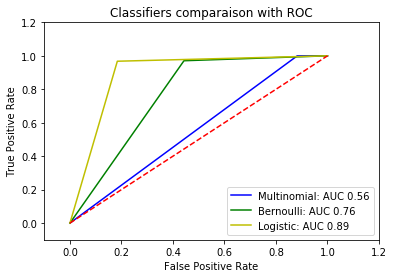

In [44]:
import numpy as np
import matplotlib.pyplot as plt
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
print(metrics.classification_report(Y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.82      0.82      0.82     16520
   negative       0.97      0.97      0.97     88643

avg / total       0.94      0.94      0.94    105163



# confusion matrices

# confusion matrix-Logistic

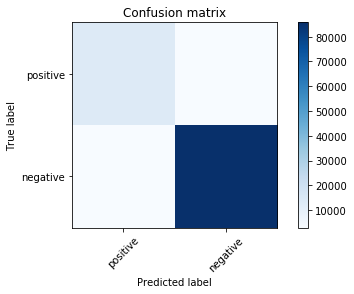

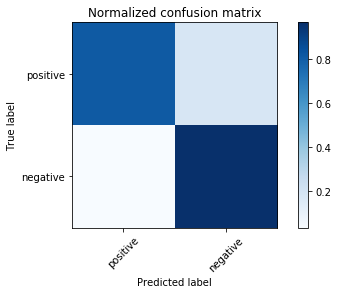

In [46]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Sentiment)))
    plt.xticks(tick_marks, set(Sentiment), rotation=45)
    plt.yticks(tick_marks, set(Sentiment))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

the positive-positive and negative-negative boxess are darker. so the prediction model works well.

# confusion matrix-Bernoulli

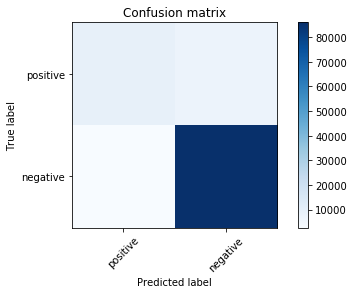

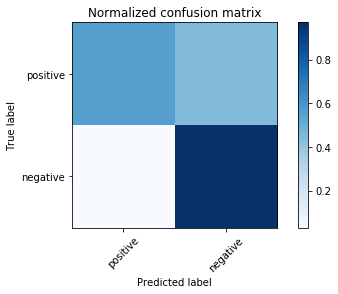

In [47]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Sentiment)))
    plt.xticks(tick_marks, set(Sentiment), rotation=45)
    plt.yticks(tick_marks, set(Sentiment))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test, prediction['Bernoulli'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

this model also works fines as the diagonal boxes are of darker shade

 # confusion matrix-multinomial

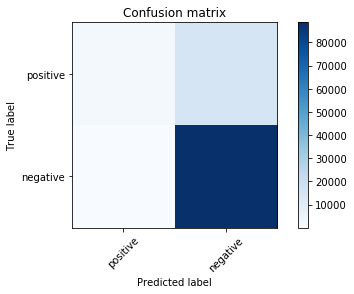

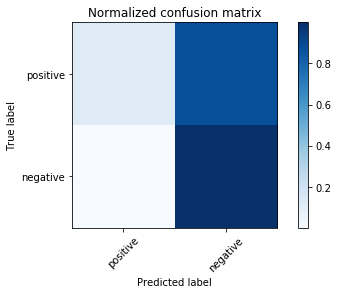

In [48]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Sentiment)))
    plt.xticks(tick_marks, set(Sentiment), rotation=45)
    plt.yticks(tick_marks, set(Sentiment))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

this is multinomial naive bayes. this model performs very average on the given dataset

# Logistic regression with regularizer

In [49]:

from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty='l2',C=1e5)
logreg.fit(X_train_tfidf, Y_train)
prediction['Logistic(l2)'] = logreg.predict(X_test_tfidf)

In [50]:
print(metrics.classification_report(Y_test, prediction['Logistic(l2)'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.82      0.82      0.82     16520
   negative       0.97      0.97      0.97     88643

avg / total       0.94      0.94      0.94    105163



In [19]:

from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty='l1',C=1e5)
logreg.fit(X_train_tfidf, Y_train)
prediction['Logistic(l1)'] = logreg.predict(X_test_tfidf)

In [20]:
print(metrics.classification_report(Y_test, prediction['Logistic(l1)'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.79      0.78      0.78     16510
   negative       0.96      0.96      0.96     88653

avg / total       0.93      0.93      0.93    105163



l2 regularizer gives better performance than l1 regularizer

# SVM

In [51]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDClassifier
import time
parameters = {'alpha':[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.0010,0.005,0.01,0.02,0.05,0.08,0.1,0.2,0.5,0.8,1.0,2.0]}
svc = SGDClassifier(n_jobs=-1,loss='hinge',penalty='l2')
grid = GridSearchCV(svc, parameters)
start=time.time()
grid.fit(X_train_tfidf, Y_train)
prediction['SVM'] = grid.predict(X_test_tfidf)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid.grid_scores_)))
print (metrics.classification_report(Y_test,prediction['SVM'],target_names=["positive","negative"]))

GridSearchCV took 197.48 seconds for 21 candidate parameter settings.
             precision    recall  f1-score   support

   positive       0.93      0.39      0.55     16520
   negative       0.90      0.99      0.94     88643

avg / total       0.90      0.90      0.88    105163



# svm confusion matrix

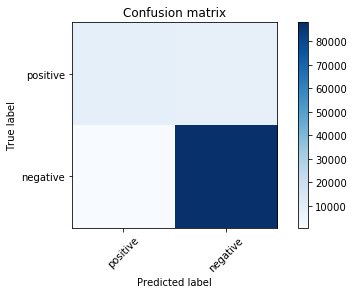

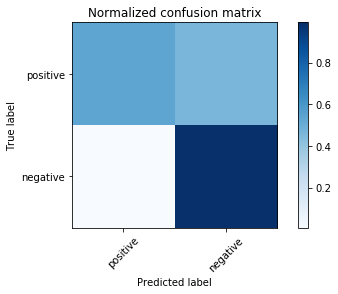

In [20]:
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Sentiment)))
    plt.xticks(tick_marks, set(Sentiment), rotation=45)
    plt.yticks(tick_marks, set(Sentiment))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test, prediction['SVM'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

# logloss 

###  1.logloss for LogisticRegression

In [52]:
print metrics.log_loss(Y_test,logreg_prob,eps=1e-15,normalize=True,sample_weight=None,labels=None)

0.445340972524


### 2.logloss for Bernoulli naive bayes

In [53]:
modelB_prob = modelB.predict_proba(X_test_tfidf)
print metrics.log_loss(Y_test,modelB_prob,eps=1e-15,normalize=True,sample_weight=None,labels=None)

0.500834314023


### 3.logloss for SVM


#### logloss cannot be computed for loss type='hinge'(python 2.7)